# Task 1: Data Exploration

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
# Load dataset
filepath = r"/Users/rosepeterfunja/Tanzania_KIC/Assignment/machine-learning-linear-regression-rhysrose/BostonHousing.csv"
df = pd.read_csv(filepath)
# Basic Exploration
print(df.head())  # Show first few rows of the dataset
print(df.info())  # Check the data types and missing values
print(df.describe())  # Summary statistics



      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

## Key Insights:
The dataset has 506 entries and 14 columns.

Feature types:

11 columns are float64 (continuous variables).

3 columns are int64 (categorical or discrete variables).

The target variable (medv) represents the median value of owner-occupied homes in $1000s.

No missing values




# Scatter Plots of Key Features vs. medv

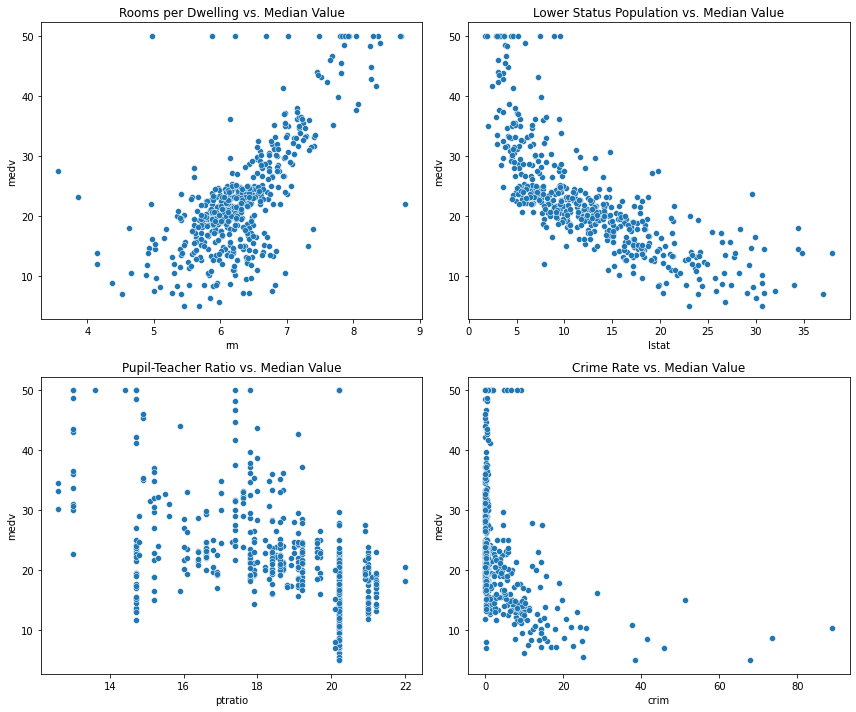

In [17]:
# Scatter plots for key features vs. median home value
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(x=df['rm'], y=df['medv'], ax=axes[0, 0])
axes[0, 0].set_title("Rooms per Dwelling vs. Median Value")

sns.scatterplot(x=df['lstat'], y=df['medv'], ax=axes[0, 1])
axes[0, 1].set_title("Lower Status Population vs. Median Value")

sns.scatterplot(x=df['ptratio'], y=df['medv'], ax=axes[1, 0])
axes[1, 0].set_title("Pupil-Teacher Ratio vs. Median Value")

sns.scatterplot(x=df['crim'], y=df['medv'], ax=axes[1, 1])
axes[1, 1].set_title("Crime Rate vs. Median Value")

plt.tight_layout()
plt.show()


## **Scatter Plots Insights (Feature vs. `medv` - Home Value)**

- **`rm` (Rooms per Dwelling) vs. `medv`:**  
  - A **positive correlation** is observed—houses with more rooms tend to have higher prices.
  - Some **outliers** exist, where a few houses with low room counts have high prices.
  
- **`lstat` (Lower Status Population) vs. `medv`:**  
  - A **strong negative correlation**—areas with a higher percentage of lower-income individuals tend to have lower home values.
  - The relationship is non-linear, suggesting a **steep price drop** as `lstat` increases.

- **`ptratio` (Pupil-Teacher Ratio) vs. `medv`:**  
  - A **weak negative correlation**—higher student-teacher ratios slightly reduce home values.
  - There is no **strong trend**, but some outliers exist.

- **`crim` (Crime Rate) vs. `medv`:**  
  - A **negative correlation**—homes in high-crime areas tend to be lower in value.
  - There are extreme outliers with very high crime rates but varying house prices.

# Correlation Heatmap

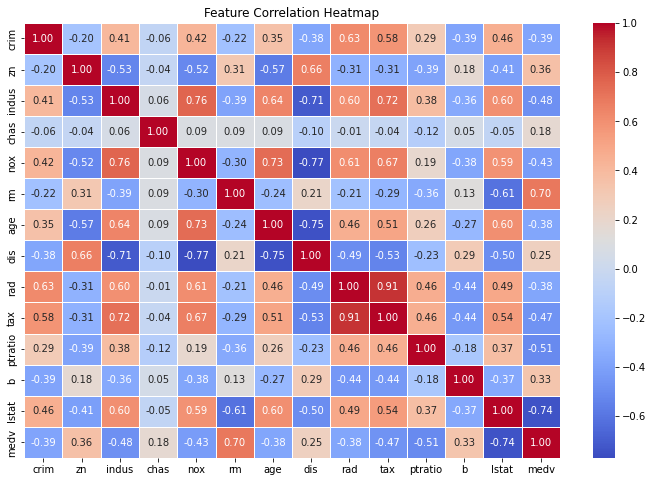

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## **Correlation Heatmap Insights**
- **Top Correlations with `medv`:**
  - `rm` (0.70) → **More rooms = Higher house prices**.
  - `lstat` (-0.74) → **Higher lower-status population = Lower house prices**.
  - `ptratio`, `indus`, and `tax` also show **moderate negative correlations**.
  
- **Multicollinearity:**
  - `tax`, `rad`, and `ptratio` are highly correlated with each other, indicating **potential redundancy** in the model.
  - High correlation between independent variables might require **feature selection or transformation**.


# Detect Outliers using Boxplots

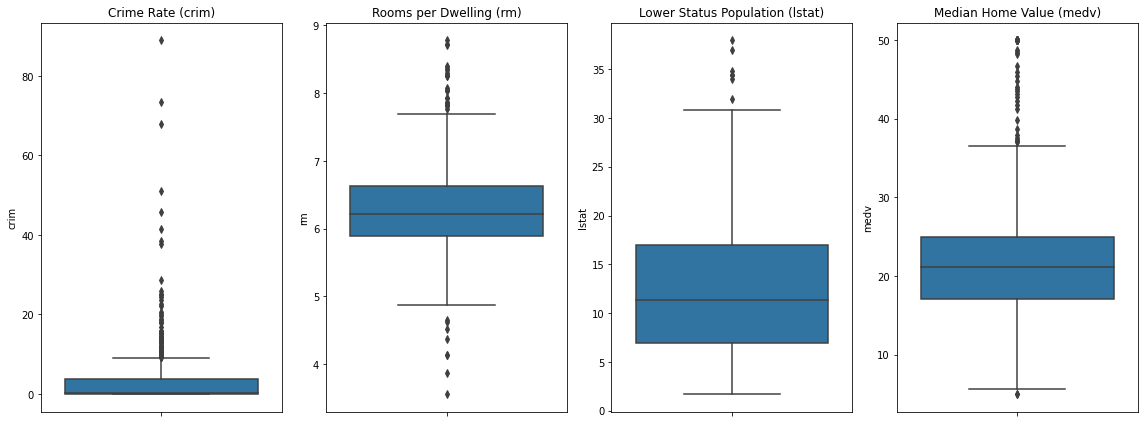

In [23]:
# Boxplots for detecting outliers in key features
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

sns.boxplot(y=df['crim'], ax=axes[0])
axes[0].set_title("Crime Rate (crim)")

sns.boxplot(y=df['rm'], ax=axes[1])
axes[1].set_title("Rooms per Dwelling (rm)")

sns.boxplot(y=df['lstat'], ax=axes[2])
axes[2].set_title("Lower Status Population (lstat)")

sns.boxplot(y=df['medv'], ax=axes[3])
axes[3].set_title("Median Home Value (medv)")

plt.tight_layout()
plt.show()

## **Outliers from Boxplots**
- **`crim` (Crime Rate):**
  - Many extreme outliers with very high crime rates (above 30), which may need transformation (e.g., log scaling).
  
- **`rm` (Rooms per Dwelling):**
  - Some outliers with very high room counts (above 8), which may represent luxury homes.

- **`lstat` (Lower Status Population):**
  - Outliers exist on the **lower end** (very wealthy areas with low `lstat` values).

- **`medv` (Median Home Value):**
  - The dataset **caps home values at $50,000**, causing a **ceiling effect** that could distort regression models.

---

## **Actionable Steps Based on Insights**
✔ **Feature Engineering:**  
  - Consider transformations (log-scaling for `crim` and `medv` to normalize distributions).  
  - Remove redundant features (e.g., `tax` and `rad` are highly correlated).  

✔ **Outlier Treatment:**  
  - Removal of extreme values in `crim`, `rm`, and `lstat`.  

✔ **Modeling Adjustments:**  
  - Address **multicollinearity** using PCA or regularization techniques in regression.  
  - Consider **non-linear models** for features like `lstat` (e.g., decision trees or polynomial regression).  

---

## **Takeaway:**  
- **More rooms = Higher house value**  
- **Higher crime & poverty = Lower house value**  
- **Multicollinearity needs handling**  

In [25]:
df.to_pickle("boston_housing.pkl")
